In [8]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/')
outdir=('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/')
images=('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/O2_consumption/')
matplotlib.__version__

'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [9]:
#Import csv of O2 consumption
O2_stats=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/weighted_avg_O2_consumption_calculations.csv')
O2_stats

,genus,20171102_genome_size_normalized_metagenome_cells/ml,20181030_genome_size_normalized_metagenome_cells/ml,20190402_genome_size_normalized_metagenome_cells/ml,20190709_genome_size_normalized_metagenome_cells/ml,RSG_cells/ml_171102,RSG_cells/ml_181030,RSG_cells/ml_190402,RSG_cells/ml_190709,20171102_cells_below_O2,...,190402_above_O2_consumption,190402_below_O2_consumption,190402_total_O2_consumption,190709_above_O2_consumption,190709_below_O2_consumption,190709_total_O2_consumption,171102_weighted_avg_O2_consumption,181030_weighted_avg_O2_consumption,190402_weighted_avg_O2_consumption,190709_weighted_avg_O2_consumption
0,AAA164-E04,842.193966,1916.455808,369.342772,857.676906,0.0,0.000000,0.000000,0.0,842.193966,...,0.000000,0.775862,0.775862,0.0,1.714323,1.714323,0.00233,0.002050,0.002101,0.001999
1,AAA536-G10,17472.787073,16915.541760,14403.280557,17721.566151,0.0,6829.787234,12408.759124,0.0,17472.787073,...,53.821006,4.189803,58.010809,0.0,35.421834,35.421834,0.00233,0.003056,0.004028,0.001999
2,AG-337-I02,2227.335509,9857.221878,1075.339238,1002.756455,0.0,9106.382979,0.000000,0.0,2227.335509,...,0.000000,2.258918,2.258918,0.0,2.004308,2.004308,0.00233,0.009284,0.002101,0.001999
3,AG-414-E02,125.191537,438.765267,401.157950,128.286002,0.0,0.000000,0.000000,0.0,125.191537,...,0.000000,0.842695,0.842695,0.0,0.256418,0.256418,0.00233,0.002050,0.002101,0.001999
4,AG-422-B15,1880.679178,3313.158567,13707.625915,6736.371699,0.0,0.000000,7445.255474,0.0,1880.679178,...,31.371807,13.155086,44.526893,0.0,13.464647,13.464647,0.00233,0.002050,0.003248,0.001999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Verrucomicrobiales,265.899026,397.482106,54.179686,280.890811,0.0,0.000000,0.000000,0.0,265.899026,...,0.000000,0.113813,0.113813,0.0,0.561444,0.561444,0.00233,0.002050,0.002101,0.001999
164,Vibrio,622.265686,620.661123,533.774653,964.925624,0.0,0.000000,0.000000,0.0,622.265686,...,0.000000,1.121277,1.121277,0.0,1.928692,1.928692,0.00233,0.002050,0.002101,0.001999
165,Vicingaceae,782.480532,470.155212,7151.270318,5084.185705,0.0,0.000000,0.000000,0.0,782.480532,...,0.000000,15.022359,15.022359,0.0,10.162261,10.162261,0.00233,0.002050,0.002101,0.001999
166,Winogradskyella,4635.264065,2001.192608,10605.994111,10722.976925,0.0,0.000000,0.000000,0.0,4635.264065,...,0.000000,22.279545,22.279545,0.0,21.433066,21.433066,0.00233,0.002050,0.002101,0.001999


### task description
I want to figure out a way to create a graph that has 
1. a cumultative total of the O2 consumed for 2018 and 2019
2. A cumultative total of the % of cells that those genera represent.  These need to be individually sorted and then either merged back together ignoring the index or stacked. so that I can generate a plot with 6 lines 2 per timepoint 1 line of cell abundance the other of the O2 consumed.
3. I might be able to stack it 
        rank  date  O2/abundance  Cumultative%

In [10]:

df1904=O2_stats[['190402_total_O2_consumption', '20190402_genome_size_normalized_metagenome_cells/ml', 'genus']].copy()
df1904=df1904[(df1904 != 0).all(1)]





In [11]:
df1810=O2_stats[['181030_total_O2_consumption', '20181030_genome_size_normalized_metagenome_cells/ml', 'genus']].copy()
df1810=df1810[(df1810 != 0).all(1)]

df1810['perc_cells']=(df1810['20181030_genome_size_normalized_metagenome_cells/ml']/df1810['20181030_genome_size_normalized_metagenome_cells/ml'].sum())*100
df1810['perc_O2']=(df1810['181030_total_O2_consumption']/df1810['181030_total_O2_consumption'].sum())*100
df1810=df1810.sort_values(by='perc_O2', ascending=False)
df1810['cum_perc_O2'] = df1810['perc_O2'].cumsum(axis=0)
df1810['cum_perc_cells'] = df1810['perc_cells'].cumsum(axis=0)
df1810.insert(5, 'rank', range(1, 1 + len(df1810)))
df1810

O2_18=df1810[['cum_perc_O2', 'rank']].copy()
O2_18=O2_18.rename(columns={'cum_perc_O2':'cum_perc'})
O2_18['level']='O2'

cells18=df1810[['cum_perc_cells', 'rank']].copy()
cells18=cells18.rename(columns={'cum_perc_cells':'cum_perc'})
cells18['level']='cells'
O2_18

stack_18=O2_18.append(cells18)
stack_18['date']='20181030'
stack_18


,cum_perc,rank,level,date
50,38.200205,1,O2,20181030
162,61.236802,2,O2,20181030
84,80.056910,3,O2,20181030
78,83.088217,4,O2,20181030
9,85.878036,5,O2,20181030
...,...,...,...,...
95,99.989004,162,cells,20181030
62,99.995046,163,cells,20181030
142,99.997021,164,cells,20181030
122,99.998561,165,cells,20181030


In [12]:
df1904=O2_stats[['190402_total_O2_consumption', '20190402_genome_size_normalized_metagenome_cells/ml', 'genus']].copy()
df1904=df1904[(df1904 != 0).all(1)]

df1904['perc_cells']=(df1904['20190402_genome_size_normalized_metagenome_cells/ml']/df1904['20190402_genome_size_normalized_metagenome_cells/ml'].sum())*100
df1904['perc_O2']=(df1904['190402_total_O2_consumption']/df1904['190402_total_O2_consumption'].sum())*100
df1904=df1904.sort_values(by='perc_O2', ascending=False)
df1904['cum_perc_O2'] = df1904['perc_O2'].cumsum(axis=0)
df1904['cum_perc_cells'] = df1904['perc_cells'].cumsum(axis=0)
df1904.insert(5, 'rank', range(1, 1 + len(df1904)))
df1904

O2_19=df1904[['cum_perc_O2', 'rank']].copy()
O2_19=O2_19.rename(columns={'cum_perc_O2':'cum_perc'})
O2_19['level']='O2'

cells19=df1904[['cum_perc_cells', 'rank']].copy()
cells19=cells19.rename(columns={'cum_perc_cells':'cum_perc'})
cells19['level']='cells'


stack_19=O2_19.append(cells19)
stack_19['date']='20190402'
stack_19

,cum_perc,rank,level,date
162,57.882296,1,O2,20190402
5,74.421103,2,O2,20190402
84,84.549096,3,O2,20190402
97,87.980679,4,O2,20190402
9,90.294163,5,O2,20190402
...,...,...,...,...
163,99.992812,162,cells,20190402
145,99.996090,163,cells,20190402
82,99.998660,164,cells,20190402
62,99.999555,165,cells,20190402


In [13]:
df1907=O2_stats[['190709_total_O2_consumption', '20190709_genome_size_normalized_metagenome_cells/ml', 'genus']].copy()
df1907=df1907[(df1907 != 0).all(1)]

df1907['perc_cells']=(df1907['20190709_genome_size_normalized_metagenome_cells/ml']/df1907['20190709_genome_size_normalized_metagenome_cells/ml'].sum())*100
df1907['perc_O2']=(df1907['190709_total_O2_consumption']/df1907['190709_total_O2_consumption'].sum())*100

df1907=df1907.sort_values(by='perc_O2', ascending=False)
df1907['cum_perc_O2'] = df1907['perc_O2'].cumsum(axis=0)
df1907['cum_perc_cells'] = df1907['perc_cells'].cumsum(axis=0)

df1907.insert(5, 'rank', range(1, 1 + len(df1907)))
df1907

O2_1907=df1907[['cum_perc_O2', 'rank']].copy()
O2_1907=O2_1907.rename(columns={'cum_perc_O2':'cum_perc'})
O2_1907['level']='O2'

cells1907=df1907[['cum_perc_cells', 'rank']].copy()
cells1907=cells1907.rename(columns={'cum_perc_cells':'cum_perc'})
cells1907['level']='cells'


stack_1907=O2_1907.append(cells1907)
stack_1907['date']='20190709'
stack_1907

,cum_perc,rank,level,date
84,36.903134,1,O2,20190709
162,56.217688,2,O2,20190709
9,68.123829,3,O2,20190709
78,73.201944,4,O2,20190709
96,76.180562,5,O2,20190709
...,...,...,...,...
3,99.990333,162,cells,20190709
82,99.993712,163,cells,20190709
127,99.996679,164,cells,20190709
95,99.999605,165,cells,20190709


In [14]:
stack=stack_18.append([stack_19, stack_1907])
stack

,cum_perc,rank,level,date
50,38.200205,1,O2,20181030
162,61.236802,2,O2,20181030
84,80.056910,3,O2,20181030
78,83.088217,4,O2,20181030
9,85.878036,5,O2,20181030
...,...,...,...,...
3,99.990333,162,cells,20190709
82,99.993712,163,cells,20190709
127,99.996679,164,cells,20190709
95,99.999605,165,cells,20190709


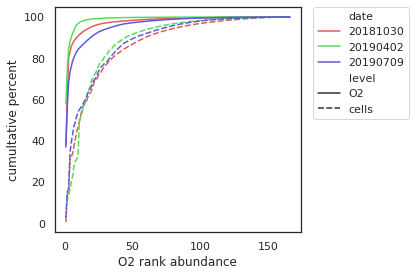

In [16]:
sns.set_style("white")
#plt.figure(figsize=(15,15))
consumption=sns.lineplot(data=stack, x="rank", 
                            y='cum_perc', style='level', hue='date', palette='hls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("cumultative percent")
plt.xlabel("O2 rank abundance")
plt.tight_layout()
plt.savefig(images+"cumultative_O2_and_cellular_abundance_by_genus.pdf")